In [14]:
import numpy as np
import matplotlib.pyplot as plt
import json
from matplotlib import cm
%matplotlib notebook

In [16]:
def cargar_datos(path):
    with open(path, "r") as f:
        data = np.loadtxt(f, delimiter=",")

    try:
        with open(path + ".params", "r") as f:
            params = json.load(f)
    except Exception as e:
        print("No hay parámetros asociados")
        params = None
        
    return data, params

# Pregunta 1

In [18]:
def plot_waveeq(U, params):
    a = params["a"]
    b = params["b"]
    t0 = params["t0"]
    tmax = params["tmax"]
    c = params["c"]
    M = params["M"]
    N = params["N"]
    [T, X] = np.meshgrid(np.linspace(t0, tmax, N), np.linspace(a, b, M))
    
    # Plot results
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel("$x$", fontsize=20)
    ax.set_ylabel("$t$", fontsize=20)
    ax.set_zlabel("$U(x,t)$", fontsize=20)
    ax.set_title("Ecuación de Onda")
    surface = ax.plot_surface(X, T, U, cmap=cm.RdYlBu_r, linewidth=0, antialiased=True, rstride=1, cstride=1)
    fig.colorbar(surface)
    plt.tight_layout()
    plt.draw()

In [40]:
def plot_last(U, params):
    a = params["a"]
    b = params["b"]
    M = params["M"]
    tmax = params["tmax"]
    xx = np.linspace(a, b, M)
    plt.figure()
    plt.grid()
    plt.xlabel("$x$")
    plt.ylabel("$U(x,25)$")
    plt.plot(xx, U[:,-1], 'r-', label="$U(x,{})$".format(tmax))
    plt.plot(xx, U[:,-1], 'ro')
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


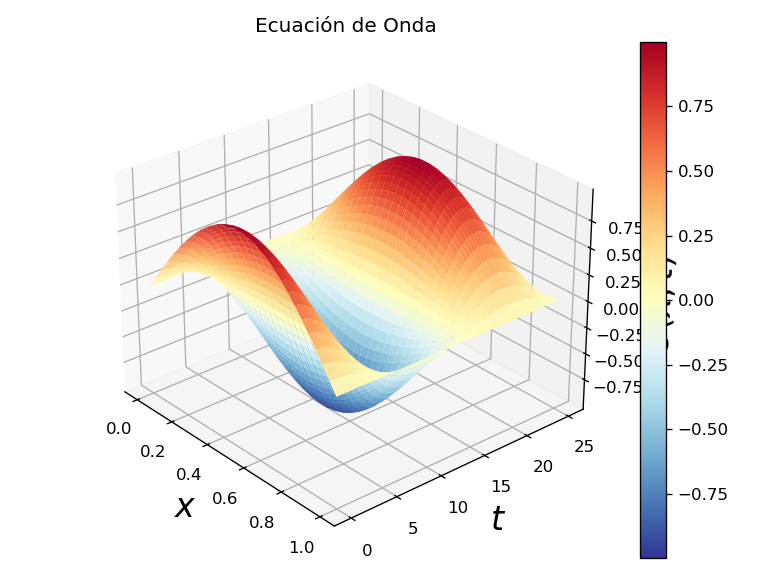

<IPython.core.display.Javascript object>


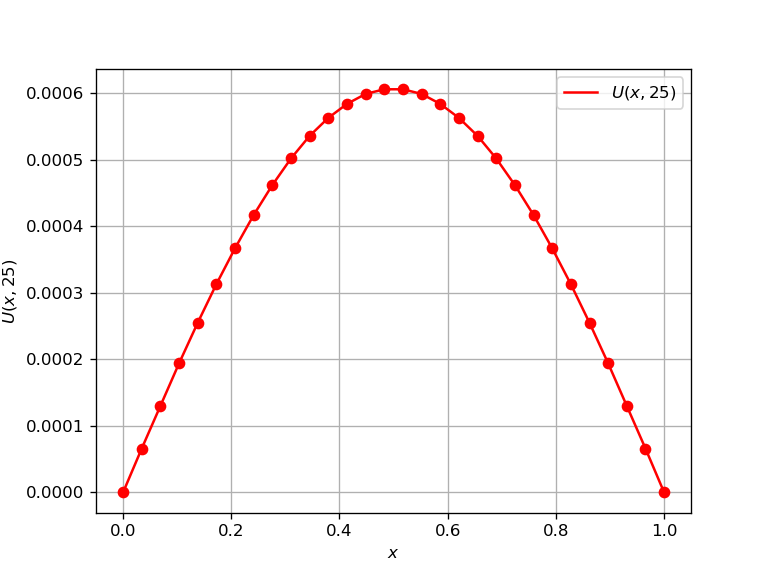

In [41]:
U, params = cargar_datos("tests/p1.txt")
plot_waveeq(U, params)
plot_last(U, params)

# f(x) = sin(np.pi * x)
# g(x) = 0
# l(t) = 0
# r(t) = 0

<IPython.core.display.Javascript object>


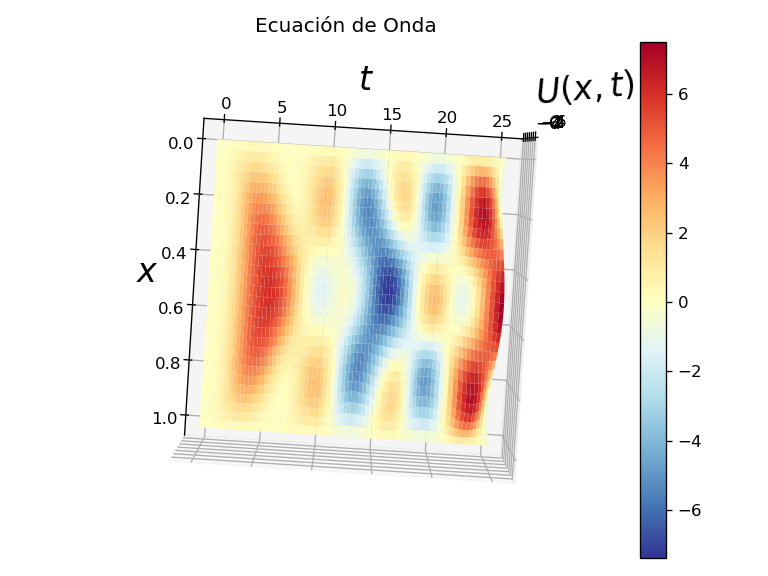

<IPython.core.display.Javascript object>


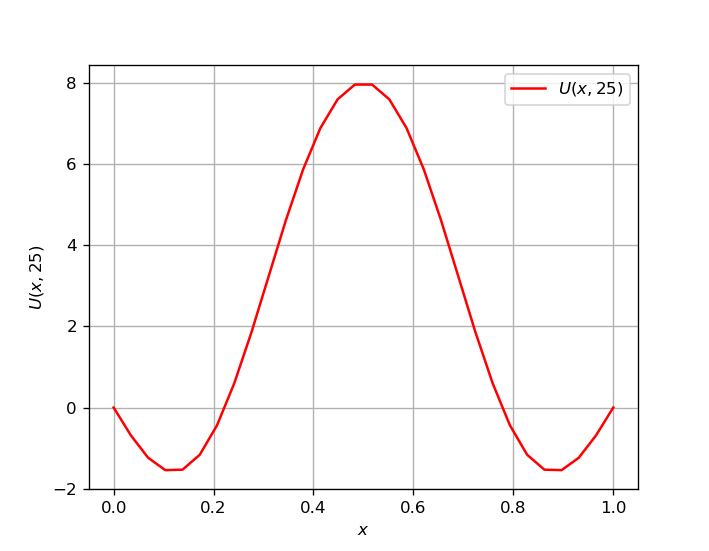

In [37]:
U, params = cargar_datos("respuestas/p1.txt")
plot_waveeq(U, params)
plot_last(U, params)

# Pregunta 2

In [42]:
def cargar_datos(path):
    with open(path, "r") as f:
        Phi = np.loadtxt(f, delimiter=",")

    with open(path + ".params", "r") as f:
        params = json.load(f)
        
    return Phi, params

In [43]:
def plot_sol(U, params):
    xl = params["xl"]
    xr = params["xr"]
    yb = params["yb"]
    yt = params["yt"]
    M = params["M"]
    N = params["N"]
    xx = np.linspace(xl, xr, M+1)
    yy = np.linspace(yb, yt, N+1)
    
    X, Y = np.meshgrid(xx, yy, indexing="ij")
    
    # Plot results
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel("$x$", fontsize=20)
    ax.set_ylabel("$y$", fontsize=20)
    ax.set_zlabel("$\phi(x,t)$", fontsize=20)
    ax.set_title("Ecuación de Poisson")
    surface = ax.plot_surface(X, Y, U, cmap=cm.plasma, linewidth=0, antialiased=True, rstride=1, cstride=1)
    fig.colorbar(surface)
    plt.tight_layout()
    plt.draw()

<IPython.core.display.Javascript object>


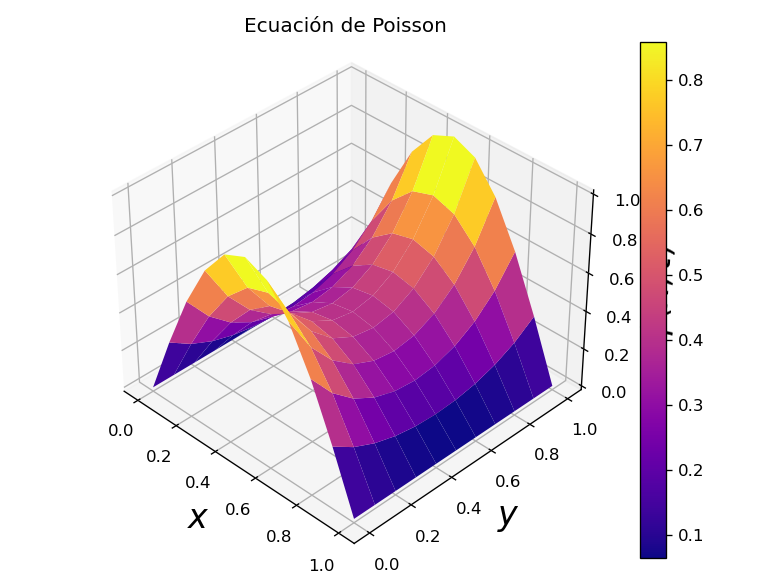

In [44]:
Phi, params = cargar_datos("tests/p2.txt")
plot_sol(Phi, params)

<IPython.core.display.Javascript object>


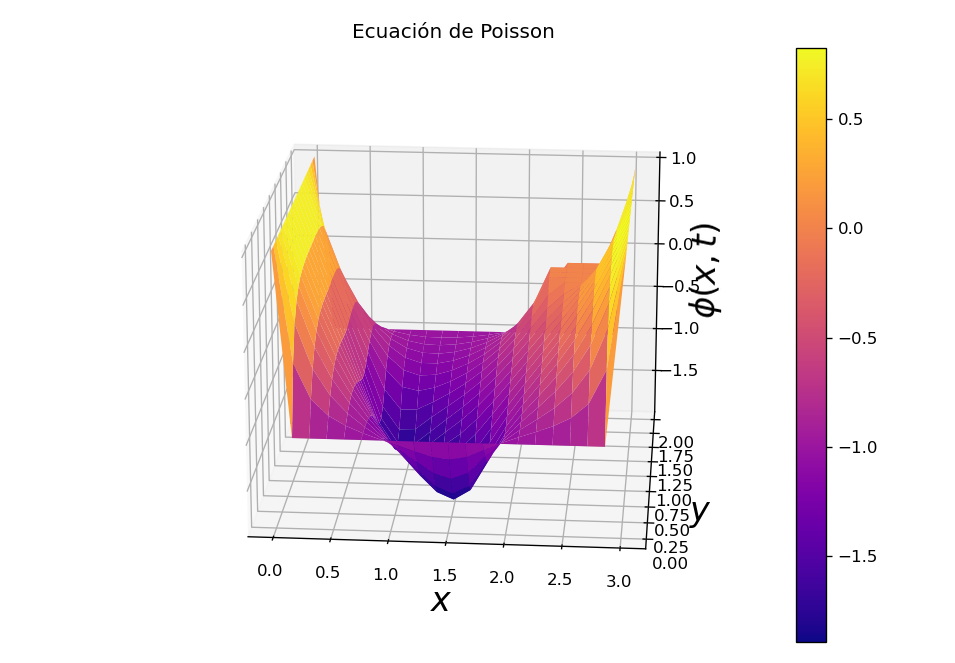

In [45]:
Phi, params = cargar_datos("p2.txt")
plot_sol(Phi, params)

<IPython.core.display.Javascript object>


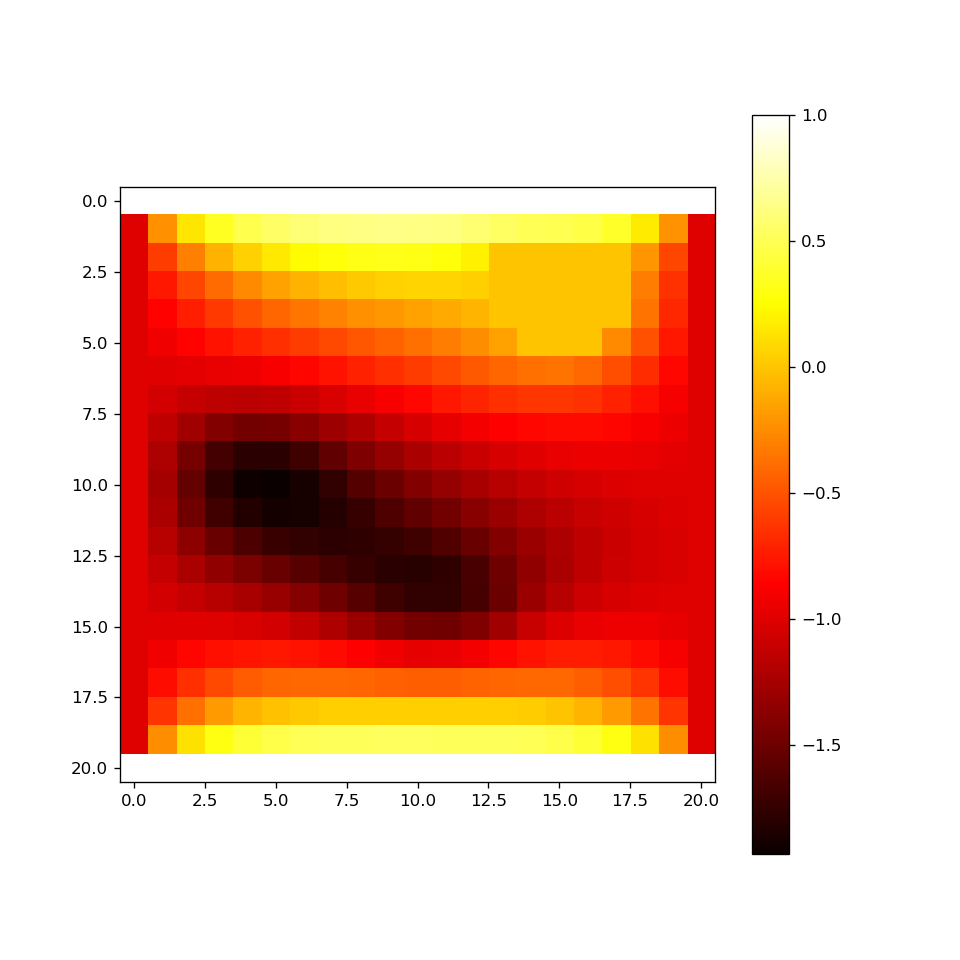

In [46]:
plt.figure(figsize=(8,8))
plt.imshow(Phi[::-1], cmap="hot", interpolation="nearest", aspect="equal")
plt.colorbar()
plt.show()

# Pregunta 3

<IPython.core.display.Javascript object>


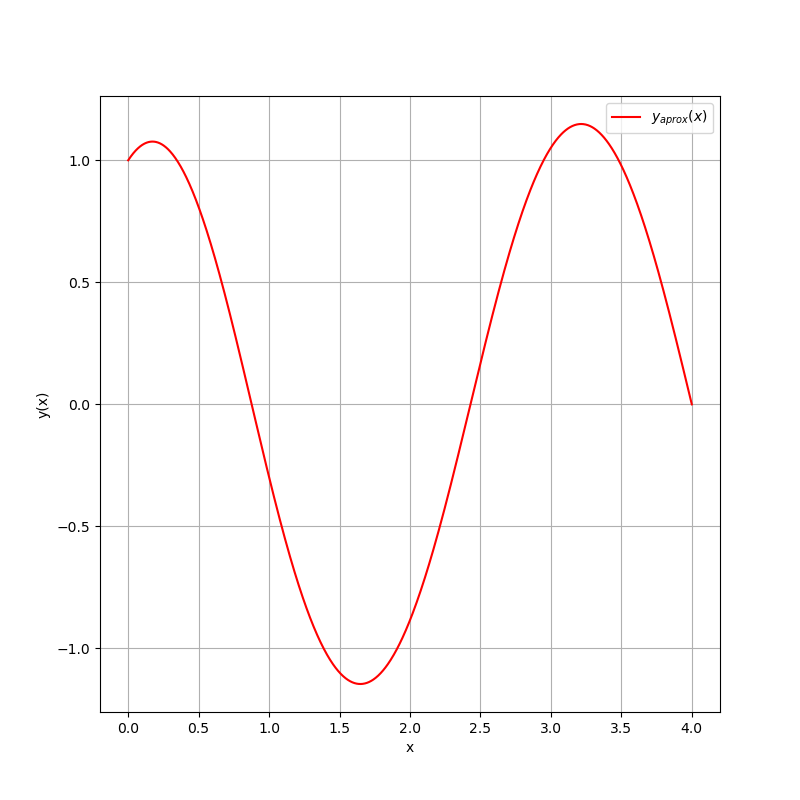

In [52]:
with open("p3.txt", "r") as f:
    data = np.loadtxt(f, delimiter=",")
    x = data[0]
    y1 = data[1]
    y2 = data[2]


def y(x):
    return np.exp(2*x)*(3 - np.exp(-2))/(np.exp(2)-np.exp(-2)) + \
           np.exp(-2*x)*(np.exp(2) - 3)/(np.exp(2)-np.exp(-2))

plt.figure(figsize=(8,8))
plt.plot(x, y1, 'r', label="$y_{aprox}(x)$")
#plt.plot(x, y(x), 'b', label="$y(x)$")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend()
plt.grid()
plt.show()